# Исследование надежности заемщиков

### Описание проекта
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели _кредитного скоринга_ — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

#### Описание данных

`children` — количество детей в семье

`days_employed` — общий трудовой стаж в днях

`dob_years` — возраст клиента в годах

`education` — уровень образования клиента

`education_id` — идентификатор уровня образования

`family_status` — семейное положение

`family_status_id` — идентификатор семейного положения

`gender` — пол клиента

`income_type` — тип занятости

`debt` — имел ли задолженность по возврату кредитов

`total_income` — ежемесячный доход

`purpose` — цель получения кредита
    
**Исследуйте данные и ответьте на вопросы**:
- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?
- Приведите возможные причины появления пропусков в исходных данных.
- Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

### План работы

1. Загрузка и изучение данных (head, info, describe)
2. Преодобработка данных:
    2. Обработка пропусков;
    2. Обработка аномалий;
    2. Удаление дубликатов;
    2. Изменение типов;
    2. Категоризация данных
3. Исследовательский анализ данных (ответы на вопросы)
4. Общий вывод по проекту

## Загрузка и изучение данных

Откроем таблицу и изучим общую информацию о данных:

In [1]:
import pandas as pd

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('C:\datasets/data.csv')

In [3]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
children,21525.0,0.538908,1.381587,-1.000000,0.000000,0.000000,1.000000,2.000000e+01
days_employed,19351.0,63046.497661,140827.311974,-18388.949901,-2747.423625,-1203.369529,-291.095954,4.017554e+05
dob_years,21525.0,43.293380,12.574584,0.000000,33.000000,42.000000,53.000000,7.500000e+01
education_id,21525.0,0.817236,0.548138,0.000000,1.000000,1.000000,1.000000,4.000000e+00
family_status_id,21525.0,0.972544,1.420324,0.000000,0.000000,0.000000,1.000000,4.000000e+00
debt,21525.0,0.080883,0.272661,0.000000,0.000000,0.000000,0.000000,1.000000e+00
total_income,19351.0,167422.302208,102971.566448,20667.263793,103053.152913,145017.937533,203435.067663,2.265604e+06


## Предобработка данных

### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца:

In [6]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости сотрудник пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом:

In [7]:
data.loc[data['total_income'].isna(), 'total_income'] = data.groupby('income_type')['total_income'].transform('median')
print(data['total_income'].isna().sum()) # Проверяем кол-во пропусков в столбце

0


### Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом здесь будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода abs():

In [8]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях:

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения можно, но этот столбец не понадобится нам для исследования. Поэтому оставим их как есть.

Выведем перечень уникальных значений столбца `children`:

In [10]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`:

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены:

In [12]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

Заполним пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`:

In [13]:
data.loc[data['days_employed'].isna(), 'days_employed'] = data.groupby('income_type')['days_employed'].transform('median')
print(data['days_employed'].isna().sum()) # Проверяем кол-во пропусков в столбце

0


Убедимся, что все пропуски заполнены:

In [14]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный

In [15]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одинаковые значения, но записанные по-разному: с использованием заглавных и строчных букв. Приводим к нижнему регистру:

In [16]:
data['education'] = data['education'].str.lower()

Выводим на экран количество строк-дубликатов в данных:

In [17]:
data.duplicated().sum()

71

Удаляем дубликаты:

In [18]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создаем в датафрейме столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используем функцию с именем `categorize_income()`:

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`:

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создаем функцию с именем `categorize_purpose()`, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.


In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Исследовательский анализ данных (EDA)

**Есть ли зависимость между количеством детей и возвратом кредита в срок?**

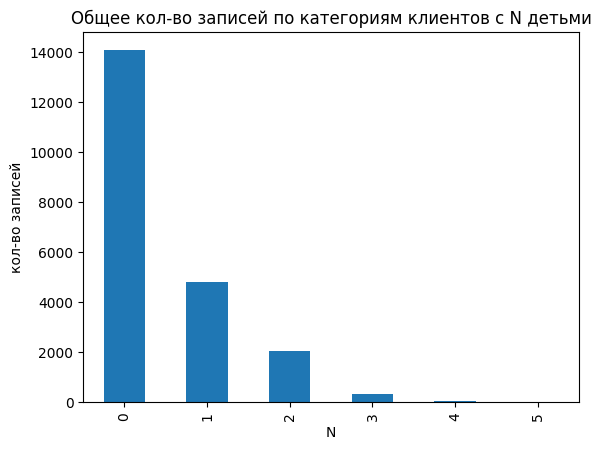

In [24]:
data.groupby('children')['debt'].count().plot(kind='bar',
                                             title='Общее кол-во записей по категориям клиентов с N детьми',
                                             xlabel='N', ylabel='кол-во записей');

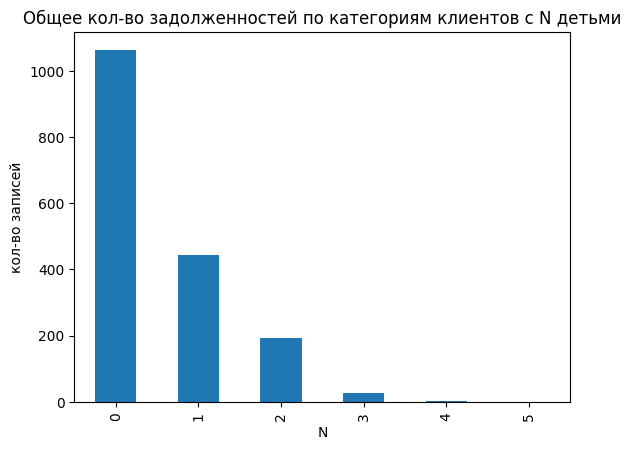

In [25]:
data.groupby('children')['debt'].sum().plot(kind='bar',
                                             title='Общее кол-во задолженностей по категориям клиентов с N детьми',
                                             xlabel='N', ylabel='кол-во записей');

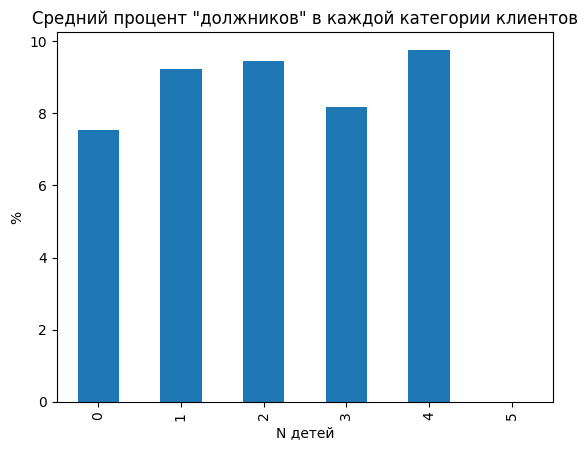

In [26]:
(data.groupby('children')['debt'].mean() * 100).plot(kind='bar',
                                             title='Средний процент "должников" в каждой категории клиентов',
                                             xlabel='N детей', ylabel='%');

**Вывод:** Выборка по категориям с 3-5 детьми крайне малочисленные (<400 записей), цифры по ним можно не принимать во внимание. По оставшимся категориям зависимость нелинейная: для бездетных процент "должников" минимальный, для имеющих детей - возрастает почти на 2%

#### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
data.groupby('family_status')['debt'].count() #общее количество записей по категориям семейного положения

family_status
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
гражданский брак          4134
женат / замужем          12261
Name: debt, dtype: int64

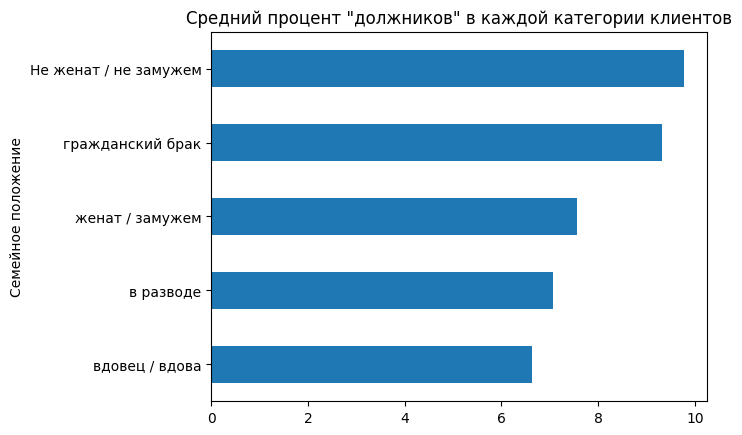

In [28]:
(data.groupby('family_status')['debt'].mean() * 100).sort_values().plot(
    kind='barh', title='Средний процент "должников" в каждой категории клиентов',
    xlabel='Семейное положение', ylabel='%');

**Вывод:** По семейному статусу выборки менее "перекошены", можно рассмотреть все категории. Наибольший процент задолженностей наблюдается для категорий "Не женат / не замужем" и "гражданский брак". Для состоящих/состоявших в браке задолженности наблюдаются примерно на 2% реже.

#### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [29]:
data.groupby('total_income_category')['debt'].count() #общее количество записей по уровням дохода

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: debt, dtype: int64

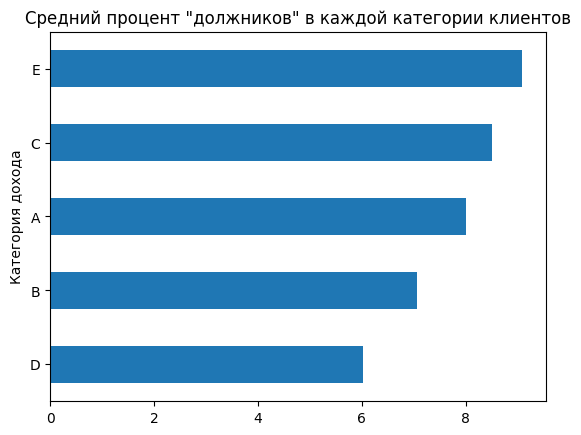

In [30]:
(data.groupby('total_income_category')['debt'].mean() * 100).sort_values().plot(
    kind='barh', title='Средний процент "должников" в каждой категории клиентов',
    xlabel='Категория дохода', ylabel='%');

**Вывод:** Выборки по категориям A, D и Е малы, по ним сложно сделать статистически значимые выводы. Для оставшегося "среднего" сегмента (B,C) все просто: меньше доход - больше задолженностей.

#### Как разные цели кредита влияют на его возврат в срок?

In [31]:
data.groupby('purpose_category')['debt'].count() #общее количество записей по категориям

purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: debt, dtype: int64

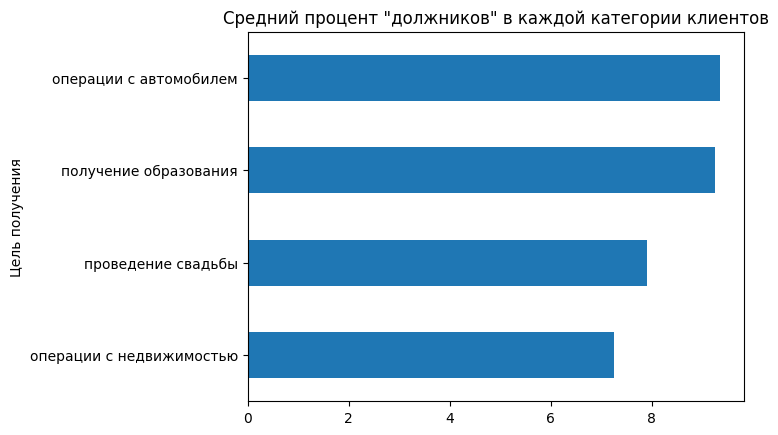

In [32]:
(data.groupby('purpose_category')['debt'].mean() * 100).sort_values().plot(
    kind='barh', title='Средний процент "должников" в каждой категории клиентов',
    xlabel='Цель получения', ylabel='%');

**Вывод:** Меньший процент задолженностей наблюдается для операций с недвижимостью и "свадебных" кредитов. Автокредиты и кредиты на получение образования примерно на 1,5% выше по задолженностям.

#### Приведите возможные причины появления пропусков в исходных данных

*Ответ:*
1. Человеческий фактор - ошибки при вводе данных, неверный формат и т.д.
2. Техника - проблемы при обработке, хранении и выгрузке данных

#### Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных

*Ответ:* Заполнение медианным значением - один из наиболее простых методов борьбы с пропусками в количественных переменных.  Он дает правдободобные результаты, особенно если мы учитываем влияние других переменных (категоризация).

## Общий вывод

Лучший заемщик - бездетная вдова с доходом выше среднего, желающая приобрести недвижимость (шутка).
На основе данных можно определить общие закономерности между возвратом кредита в срок и уровнем дохода, семейным положением и др. факторами, зачастую неявными.
- Среди бездетных заемщиков процент "должников" минимальный, для имеющих 1-2 детей - возрастает почти на 2%.
- Наибольший процент задолженностей наблюдается для категорий "Не женат / не замужем" и "гражданский брак". Для состоящих/состоявших в браке задолженности наблюдаются примерно на 2% реже.
- Для заемщиков "среднего" сегмента (суммарный доход от 50 тыс. до 1 млн. руб.) наблюдается простая закономерность: меньше доход - больше задолженностей.
- Меньший процент задолженностей наблюдается для операций с недвижимостью и "свадебных" кредитов. Автокредиты и кредиты на получение образования примерно на 1,5% хуже по задолженностям.